In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from livelossplot import PlotLossesKeras
# import keras models
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils

In [16]:
# set random seed globally
my_seed = 21
from numpy.random import seed
seed(my_seed)
import tensorflow as tf
tf.random.set_seed(my_seed) 
# tensorflow version
print(tf.__version__)

2.10.0


Covertype Data Set

In [17]:
# Import dataframe from https://archive.ics.uci.edu/ml/datasets/Covertype

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz', 
                 names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
                            'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                            'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
                            'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
                            'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
                            'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
                            'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
                            'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
                            'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
                            'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'class']) # class = Cover_Type

df['class'] = df['class'] - 1 #encoding classes to start from 0 and go until 6. Initial dataset had classes from 1 to 7.
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,4
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,4
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,1
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,1
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,2
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,2
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,2
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,2


In [18]:
def buildDataSet (df, test_data_fraction):
    
    encoded_df = df

    # Set the total number of classes
    nb_classes = len(encoded_df['class'].unique())

    # Creating target and features
    X = encoded_df.drop(['class'], axis=1)
    y = encoded_df['class']

    # scale the variables
    sc = StandardScaler() 
    X_scaled = sc.fit_transform(X)

    # Split into train and test set and normalize data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = test_data_fraction,stratify=y) #, random_state = 0)


    return encoded_df, nb_classes, X_train, X_test, y_train, y_test

In [19]:
# build dataset on our dataframe
encoded_dataframe, nb_classes, X_train, X_test, y_train, y_test = buildDataSet (df, 0.2)

print(encoded_dataframe.head())

print("")

print(f"classes_in_dataset = {nb_classes}")

print("")

print(f"X_train.shape = {X_train.shape}")
print(f"X_test.shape = {y_train.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"y_test.shape = {y_test.shape}")

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

In [20]:
class CustomWeight(tf.keras.initializers.Initializer):
    def __init__(self):
        print('gg')
    def constant_weight(self,num):
        return tf.keras.initializers.Constant(num)
    
    def normal_weight(self,mean,stddev):
        return tf.keras.initializers.RandomNormal(mean, stddev)

In [21]:
def buildSequentialModel(hidden_layers_activation, first_layer_node_count, dropout_fraction, nb_classes,weight_class, wt_mean, wt_std, bias_mean, bias_std):
    # Build a Sequential Model.
    model = Sequential()
    # model.add(Flatten(input_shape=(28, 28)))
    
    model.add(Dense(first_layer_node_count, kernel_initializer=weight_class.normal_weight(wt_mean,wt_std), activation=hidden_layers_activation,bias_initializer=weight_class.normal_weight(bias_mean,bias_std)))
    model.add(Dropout(dropout_fraction))
    model.add(Dense(first_layer_node_count*0.8, kernel_initializer=weight_class.normal_weight(wt_mean,wt_std), activation=hidden_layers_activation,bias_initializer=weight_class.normal_weight(bias_mean,bias_std)))
    model.add(Dropout(dropout_fraction))
    model.add(Dense(first_layer_node_count*0.6, kernel_initializer=weight_class.normal_weight(wt_mean,wt_std), activation=hidden_layers_activation,bias_initializer=weight_class.normal_weight(bias_mean,bias_std)))
    model.add(Dropout(dropout_fraction))
    
    # Output Layer
    model.add(Dense(nb_classes, activation=hidden_layers_activation, kernel_initializer=weight_class.normal_weight(wt_mean,wt_std), bias_initializer=weight_class.normal_weight(bias_mean,bias_std)))
   
   
    return model

In [22]:
# iterations = 1 # number of iterations that we plan to perform for each pair of hidden_layer_af - output_layer_af
# Hidden_AF_list = ['relu', 'gelu', 'selu', 'sigmoid', 'tanh', 'softmax']
hidden_layer_activation='gelu'
First_Hidden_Layer_Tensor_Count = 100
TrainTest_Split = 0.25
dropout_fraction = 0.3
wt_mean=0
wt_std=0.5
bias_mean=0
bias_std=0.25

In [23]:
# instantiate model
model = buildSequentialModel(hidden_layer_activation, First_Hidden_Layer_Tensor_Count, dropout_fraction, nb_classes,CustomWeight(), wt_mean, wt_std, bias_mean, bias_std)
# model = buildSequentialModel('tanh', 'softmax',CustomWeight()) # change activation functions
# compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

gg


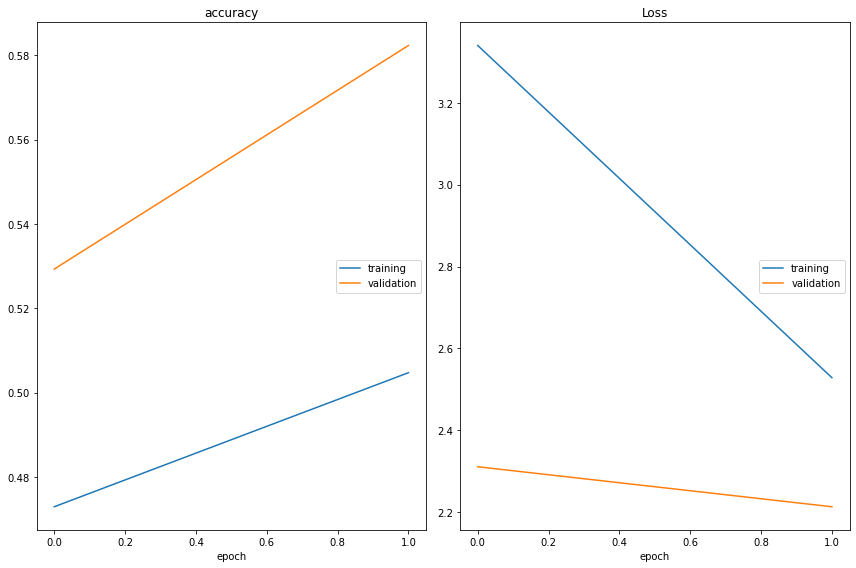

accuracy
	training         	 (min:    0.473, max:    0.505, cur:    0.505)
	validation       	 (min:    0.529, max:    0.582, cur:    0.582)
Loss
	training         	 (min:    2.529, max:    3.340, cur:    2.529)
	validation       	 (min:    2.213, max:    2.311, cur:    2.213)
4649/4649 [==============================] - 28s 6ms/step - loss: 2.5285 - accuracy: 0.5047 - val_loss: 2.2133 - val_accuracy: 0.5823
Epoch 3/1500
1081/4649 [=====>........................] - ETA: 22s - loss: 2.3687 - accuracy: 0.5189

In [24]:
model.fit(X_train, y_train,callbacks=[PlotLossesKeras()],
          batch_size=100, epochs=1500, verbose=1,
          validation_data=(X_test, y_test))